In [70]:
import warnings

import pandas as pd
import numpy as np

from wordfreq import word_frequency, get_frequency_list
from textblob.tokenizers import word_tokenize

In [47]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [71]:
warnings.simplefilter('ignore')

In [45]:
pd.options.display.max_rows = 200

In [2]:
books = pd.read_csv('../data/books.csv')

In [5]:
counts = pd.read_json('../data/text-count.json/part-00000-8674637a-fa75-47f1-888d-7dc5e84bdd3a-c000.json', lines=True)

In [23]:
books = pd.merge(books, counts, left_on='book_id', right_on='text_id')

In [152]:
titles, scores, authors = [], [], []
for r in books.itertuples():

    title = (r.original_title
        if not pd.isnull(r.original_title)
        else r.title)
    
    author = r.authors.split(', ')[0]
    
    titles.append(title)
    authors.append(author)

    a_tokens = [author.split()[-1]]
    t_tokens = list(word_tokenize(title))
    
    if not (t_tokens and a_tokens):
        scores.append(0)
    
    else:
        tokens = (*t_tokens, *a_tokens)
        scores.append(sum([np.log(word_frequency(t, 'en')) for t in tokens]))

In [153]:
books['score'] = scores
books['title'] = titles
books['author'] = authors

In [154]:
ranks = books[['title', 'author', 'score', 'count']]

In [155]:
ranks.sort_values('count', ascending=False).head(100)

,title,author,score,count
259,Heart of Darkness,Joseph Conrad,-35.178494,6141
1166,Sonnets,William Shakespeare,-25.743097,5567
3170,Utilitarianism,John Stuart Mill,-25.649468,5174
764,Paradise Lost,John Milton,-31.315850,4561
2992,Deadline,Mira Grant,-21.205504,4434
1718,Personal,Lee Child,-17.201091,4391
4227,Orientalism,Edward Said,-22.450137,4245
1228,The Yellow Wallpaper,Charlotte Perkins Gilman,-39.395936,4065
2266,Politics,Aristotle,-22.312063,4033
2573,On Liberty,John Stuart Mill,-26.409951,3870


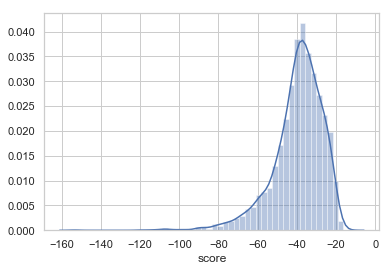

In [156]:
sns.distplot(ranks.score[ranks.score > float('-inf')])

In [157]:
ranks.score[ranks.score > float('-inf')].describe()

count    3309.000000
mean      -39.566762
std        12.964016
min      -153.344943
25%       -45.222928
50%       -37.784497
75%       -30.900507
max       -13.425200
Name: score, dtype: float64

In [169]:
ranks = books[books.score < -25][['book_id', 'count', 'title', 'author']]
ranks.rename(columns=dict(book_id='goodreads_rank'), inplace=True)
ranks.sort_values('count', ascending=False, inplace=True)
ranks.reset_index(drop=True, inplace=True)
ranks['syllabus_rank'] = ranks.index + 1
ranks.set_index('syllabus_rank', inplace=True)
ranks.title = ranks.title.str[:50]
ranks.authors = ranks.author.str[:50]

In [170]:
ranks.head(100)

,goodreads_rank,count,title,author
syllabus_rank,,,,
1,301,6141,Heart of Darkness,Joseph Conrad
2,1666,5567,Sonnets,William Shakespeare
3,6225,5174,Utilitarianism,John Stuart Mill
4,984,4561,Paradise Lost,John Milton
5,1785,4065,The Yellow Wallpaper,Charlotte Perkins Gilman
6,4733,3870,On Liberty,John Stuart Mill
7,4777,3868,A Rose for Emily,William Faulkner
8,804,3709,The Tempest,William Shakespeare
9,410,3439,Things Fall Apart,Chinua Achebe


In [171]:
ranks.to_csv('../data/gr-ranks.csv')